<a href="https://colab.research.google.com/github/esramostafa20/Regression-Models-/blob/main/07_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. Logistic Regression (Note: Classification, but often confused as regression)

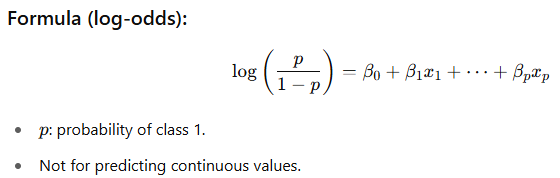


## When to use:
1. When the outcome is binary or categorical.

2. For classification problems.

## When not to use:
1. For continuous target variables.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/final_student_data.csv")  # Or use any built-in dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
df['passed'] = (df['total'] >= 150).astype(int)
df.head()

,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,passed
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True,1
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False,1
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True,1
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True,0
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True,1


In [ ]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total','passed'])  # or keep only relevant
y = df['passed']                 # binary target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict and clip to range
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.86


In [ ]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  27]
 [  1 172]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



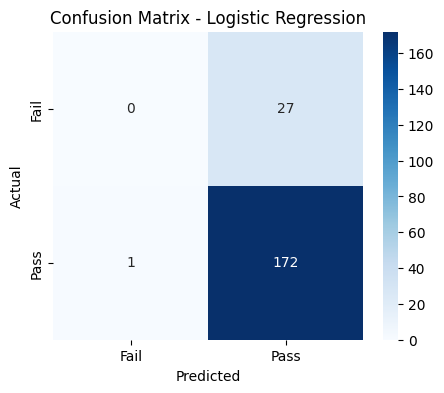

In [ ]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

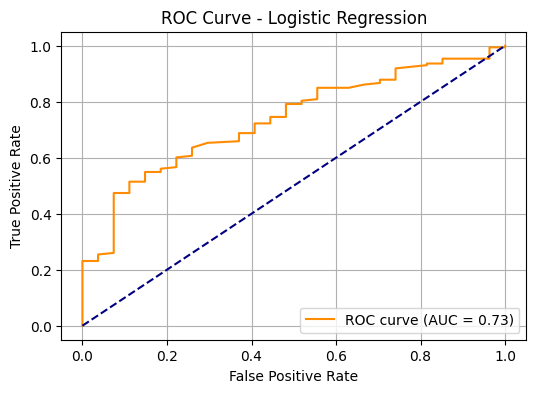

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for class 1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## To measure how well your model can distinguish between class 0 and class 1, across all possible thresholds.

1. ROC Curve = plots True Positive Rate (TPR) vs. False Positive Rate (FPR)

2. AUC = single number that summarizes the ROC curve (higher = better)

3. fpr = False Positive Rate at different thresholds

4. tpr = True Positive Rate (a.k.a. recall)

5. thresholds = threshold values used to generate each FPR/TPR pair


| **True Positive (TP)**  | The model predicted **Positive**, and it was **actually Positive** |

| **False Positive (FP)** | The model predicted **Positive**, but it was **actually Negative** |

| **True Negative (TN)**  | The model predicted **Negative**, and it was **actually Negative** |

| **False Negative (FN)** | The model predicted **Negative**, but it was **actually Positive** |
